In [1]:
from ava.segmenting.utils import get_spec
from ava.segmenting.amplitude_segmentation import get_onsets_offsets
from scipy.io import wavfile
from matplotlib.pyplot import *
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('talk')

In [3]:
#get vocalization and noise examples to demonstrate segmenting
audio_fn = '2020_07_22_15_52_33_369348_merged.wav'
sr_audio, audio = wavfile.read(audio_fn)
start, stop  = int(2.685*sr_audio), int(3.571*sr_audio) #pick a chunk of vocalizations
audio1 = audio[start:stop]

audio_fn = '2020_07_23_20_42_27_891232_merged.wav'
sr_audio, audio = wavfile.read(audio_fn)
start, stop = int(1156.349*sr_audio), int(1158.208*sr_audio) #pick a chunk of noise
audio2 = audio[start:stop]

example_audio = np.concatenate((audio1, audio2)) #combine them

In [4]:
#indicate segmentation parameters
seg_params = {
    'min_freq': 500, # minimum frequency
    'max_freq': 62.5e3, # maximum frequency
    'nperseg': 512, # FFT
    'noverlap': 256, # FFT
    'spec_min_val': -8, # minimum log-spectrogram value
    'spec_max_val': -7.25, # maximum log-spectrogram value
    'fs': 125000, # audio samplerate
    'th_1':2, # segmenting threshold 1
    'th_2':5, # segmenting threshold 2
    'th_3':2, # segmenting threshold 3
    'min_dur':0.03, # minimum syllable duration
    'max_dur': 0.3, # maximum syllable duration
    'smoothing_timescale': 0.007, # amplitude
    'softmax': False, # apply softmax to the frequency bins to calculate
                      # amplitude
    'temperature':0.5, # softmax temperature parameter
    'algorithm': get_onsets_offsets, # (defined above)
}

#get onsets, offsets, and amplitude trace
on, off, traces = get_onsets_offsets(example_audio, seg_params, return_traces=True)

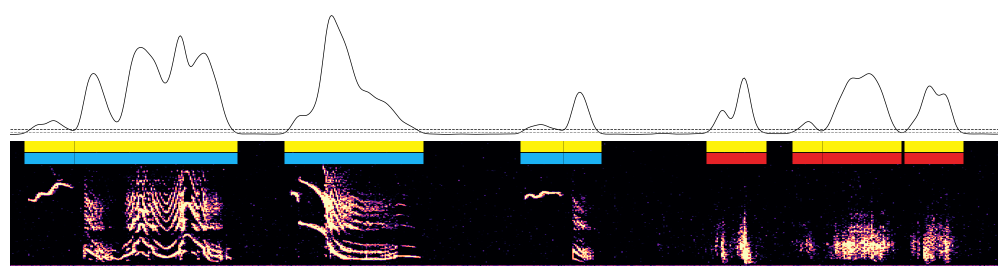

In [10]:
#set spectrogram parameters
p = {'fs':125000, 
     'nperseg': 512,
     'noverlap': 256,
     'min_freq': 10, 
     'max_freq': 62.5e3, 
     'spec_min_val': -8,
     'spec_max_val': -7.25}

#get spectrogram
spec, dt, _ = get_spec(example_audio, p)

#plot spectrogram with amplitude trace, and onsets/offsets
audio_len = example_audio.shape[0]/sr_audio
x_lo, x_hi = 0, spec.shape[1]

figure(figsize=(10,4))

subplot(311)
plot(traces[0], 'k', linewidth=.5)
xlim(x_lo,x_hi)
axis('off')
hlines(2, x_lo, x_hi, linewidth=0.5, color='gray', linestyle='--')
hlines(5, x_lo, x_hi, linewidth=0.5, color='k', linestyle='--')
ylim(0,100)
xlim(0, 1.4/audio_len*spec.shape[1])

subplot(312)
imshow(spec, cmap='magma')
axis('auto')
gca().invert_yaxis()
xlim(x_lo,x_hi)
axis('off')
[hlines(245, on[i]/audio_len*spec.shape[1], off[i]/audio_len*spec.shape[1], color='#fef20a', linewidth=8) for i in range(len(on))]
[hlines(220, on[i]/audio_len*spec.shape[1], off[i]/audio_len*spec.shape[1], color='#1bb2f4', linewidth=8) for i in np.where(np.array(on)<.8)[0]]
[hlines(220, on[i]/audio_len*spec.shape[1], off[i]/audio_len*spec.shape[1], color='#e62227', linewidth=8) for i in np.where(np.array(on)>.8)[0]]
xlim(0, 1.4/audio_len*spec.shape[1])
tight_layout(pad=0.25)
# savefig('segmenting-schematic.svg', dpi=300)

In [6]:
#to segment many files, see https://autoencoded-vocal-analysis.readthedocs.io/en/latest/segment.html
#also see "figure1-vocalization-segmenting.ipynb"